## **Code playground for SDA sem 12**

# Graph

## Graph representation

Lets consider the following graph(V, E):

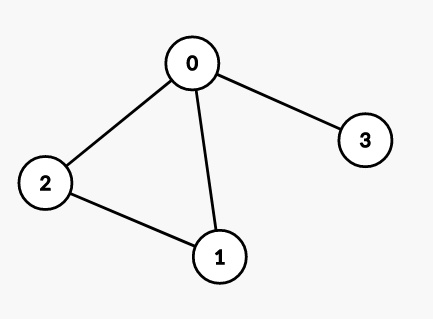

### Adjacency matrix

Requires *V<sup>2</sup>* memory. Used for dense graphs. Represented as boolean matrix where each cell is *1 (True)* if there is an edge between vertexes *i* and *j* and *0 (False)* otherwise.

In [3]:
graph = [
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [1, 0, 0 ,0]
]

## Adjacency list

Requires *V + E* memory. Used for sparse graphs. Represented as dictionary where each vertex is a key, with value - a set of neighboring vertexes. The set allows for *O(1)* check if there is an edge between two vertexes.

In [9]:
graph = {
    0: set([1, 2, 3]),
    1: set([0, 2]),
    2: set([0, 1]),
    3: set([0])
}

## Breadth-first search

The algorithm traverses the graph starting from a given vertex. It first finds the vertexes that are neighbors with the starting one (*distance = 1*), then vertexes that are  at *distance = 2*, etc.

In [15]:
graph = {
    0: set([1, 2, 3]),
    1: set([0, 2, 4]),
    2: set([0, 1]),
    3: set([0, 5]),
    4: set([1, 5]),
    5: set([3, 4])
}

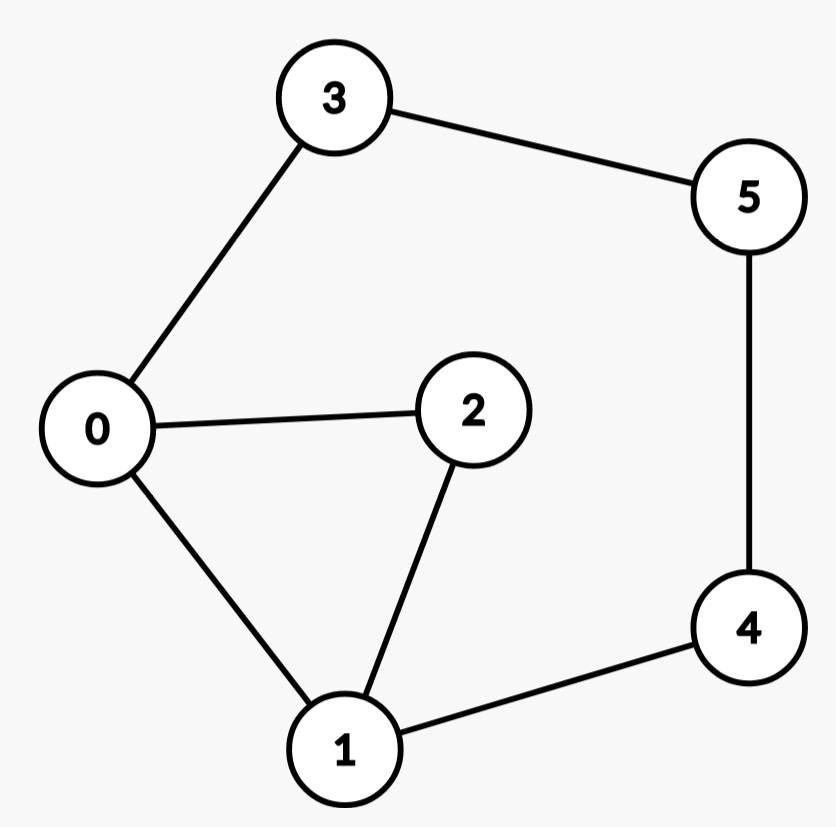

The algorithms uses a *queue* (*deque*) to keep track of the order in which the vertexes must be traversed and a *set* that saves the vertexes that have already been visited (where popped from the queue or are already in the queue). 

In [19]:
from collections import deque

def bfs(start_vertex, graph):
    q = deque([start_vertex])
    visited = set([start_vertex])

    distance = 0

    while q:
        print(f"At distance {distance}:")
        
        for _ in range(len(q)):
            current = q.popleft()
            print(current)

            for neighbor in graph[current]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    q.append(neighbor)
        
        distance += 1

bfs(0, graph)

At distance 0:
0
At distance 1:
1
2
3
At distance 2:
4
5


*O(V + E) time complexity*

BFS finds the shortest distance from a starting vertex to all others in an unweighted graph - when each edge has the same weight\ length. 

In [18]:
from collections import deque

def bfs(start_vertex, graph):
    q = deque([start_vertex])
    visited = set([start_vertex])

    distances_arr = [-1] * len(graph.keys())
    distance = 0

    while q:
        for _ in range(len(q)):
            current = q.popleft()
            distances_arr[current] = distance

            for neighbor in graph[current]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    q.append(neighbor)
        
        distance += 1

    return distances_arr

starting_vertex = 0
distances = bfs(starting_vertex, graph)
print(distances)

[0, 1, 1, 1, 2, 2]
